C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

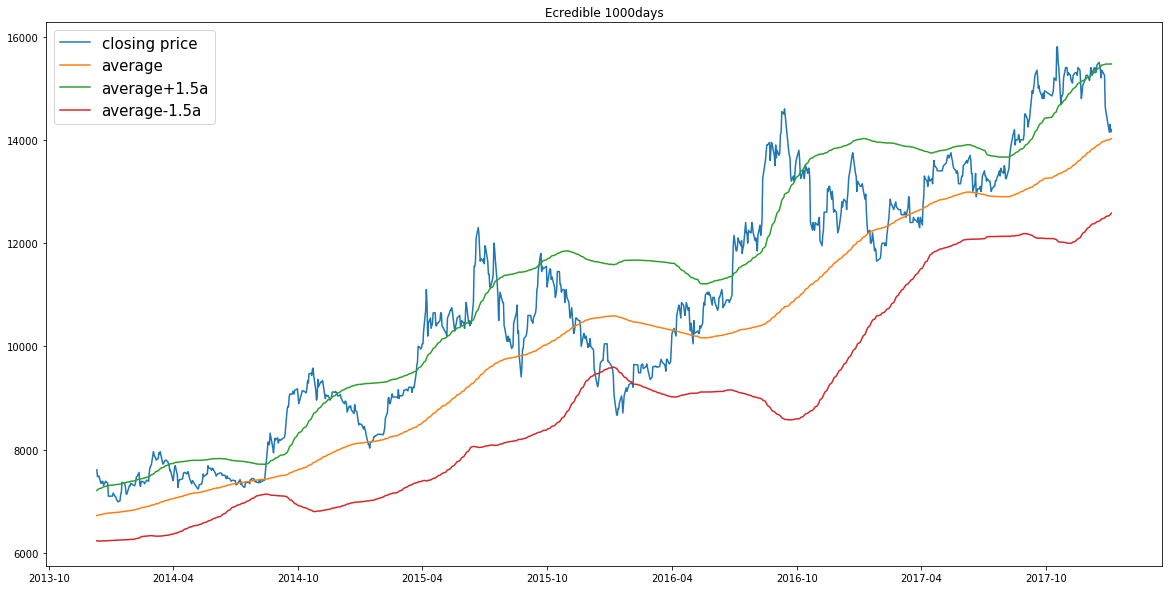

In [15]:
'''
This program is made for show graph that includes 200-days of Ecredible portfolio.

Workflow:
1. get 200days of Ecredible's closing price from Naver_finance.
2. Save those into csv file.
3-1. draw closing price graph.
3-2. calculate mean and 2std dev. Then draw them.
'''

from bs4 import BeautifulSoup
import requests as rq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


code = '092130'
pages = 121
table = []
days = 1000

for page in range(1, pages):
    url = 'http://finance.naver.com/item/sise_day.nhn?code='+code+'&page='+str(page)
    s = rq.get(url)
    soup = BeautifulSoup(s.text, 'html.parser')
    lst = soup.find_all('tr')
    header = lst[0].text.split()
    for i in range(len(lst)):
        if lst[i].text.split() and i != 0 and i != len(lst)-1:
            table.append(lst[i].text.split())

df = pd.DataFrame(table, columns=header)
df1 = pd.DataFrame(df, columns=['날짜', '종가', 'average', 'std_dev', '1.5alpha'])
df2 = pd.DataFrame(df1[0:days])

for i in range(len(df1)):
    df1['종가'][i] = int(df1['종가'][i].replace(',', ''))

for i in range(days):
    df2['average'][i] = int(df1['종가'][i:i+200].mean())
    df2['std_dev'][i] = int(df1['종가'][i:i+200].std())
    df2['날짜'][i] = datetime.strptime(df2['날짜'][i], '%Y.%m.%d')
    df2['1.5alpha'][i] = int(df2['std_dev'][i]*1.5)


day = df2['날짜']
c = df2['종가']
m = df2['average']
a = df2['1.5alpha']

plt.figure(figsize=(20, 10))
plt.title('Ecredible '+str(days)+'days')
lines = plt.plot(day, c, day, m, day, m+a, day, m-a)
plt.legend([lines[0],lines[1],lines[2],lines[3]], ['closing price','average','average+1.5a', 'average-1.5a'], prop={'size':15})

plt.show()

In [61]:
df2['temp'] = 0 # closing - (average + 1.5sigma)
df2['temp1'] = 0 # closing - (average - 1.5sigma)
for i in range(days):
    df2['temp'][i] = c[i] - (m[i] - a[i]) 
    df2['temp1'][i] = c[i] - (m[i] + a[i]) 

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [64]:
# 변곡점 찾으려, -1.5sigma
df3 = df2.loc[(df2['temp'] > -100) & (df2['temp'] < 100)]
df3

,날짜,종가,average,std_dev,1.5alpha,temp,temp1
469,2016-02-04 00:00:00,9210,10476.0,799.0,1198.0,-68,-2464
470,2016-02-03 00:00:00,9270,10482.0,794.0,1191.0,-21,-2403
471,2016-02-02 00:00:00,9310,10488.0,789.0,1183.0,5,-2361
472,2016-02-01 00:00:00,9290,10493.0,785.0,1177.0,-26,-2380
473,2016-01-29 00:00:00,9260,10499.0,780.0,1170.0,-69,-2409
491,2016-01-05 00:00:00,9550,10590.0,664.0,996.0,-44,-2036
492,2016-01-04 00:00:00,9610,10588.0,668.0,1002.0,24,-1980
501,2015-12-17 00:00:00,9520,10559.0,713.0,1069.0,30,-2108
502,2015-12-16 00:00:00,9400,10556.0,717.0,1075.0,-81,-2231
505,2015-12-11 00:00:00,9410,10552.0,725.0,1087.0,-55,-2229


In [65]:
# 변곡점 찾으려, +1.5sigma
df4 = df2.loc[(df2['temp1'] > -100) & (df2['temp1'] < 100)]
df4

,날짜,종가,average,std_dev,1.5alpha,temp,temp1
7,2017-12-22 00:00:00,15350,13959.0,992.0,1488.0,2879,-97
9,2017-12-20 00:00:00,15350,13933.0,992.0,1488.0,2905,-71
10,2017-12-19 00:00:00,15450,13919.0,991.0,1486.0,3017,45
12,2017-12-15 00:00:00,15450,13892.0,985.0,1477.0,3035,81
13,2017-12-14 00:00:00,15350,13879.0,982.0,1473.0,2944,-2
14,2017-12-13 00:00:00,15300,13865.0,980.0,1470.0,2905,-35
15,2017-12-12 00:00:00,15400,13852.0,978.0,1467.0,3015,81
16,2017-12-11 00:00:00,15400,13839.0,975.0,1462.0,3023,99
17,2017-12-08 00:00:00,15250,13826.0,971.0,1456.0,2880,-32
18,2017-12-07 00:00:00,15350,13814.0,969.0,1453.0,2989,83


In [66]:
writer = pd.ExcelWriter('Ecredible_1000.xlsx', engine='xlsxwriter')

df3.to_excel(writer, encoding='utf8', index=False, sheet_name='Buy')
df4.to_excel(writer, encoding='utf8', index=False, sheet_name='Sell')

writer.save()

In [96]:
cnt = 0
for i in range(1, days):
    if df2['temp1'][i] < 0:
        if df2['temp1'][i-1] > 0: 
            
            print(day[i], c[i])
            cnt += 1

cnt

2017-12-14 00:00:00 15350
2017-12-08 00:00:00 15250
2017-12-04 00:00:00 15150
2017-11-27 00:00:00 15150
2017-08-08 00:00:00 13450
2016-06-28 00:00:00 11000
2015-09-18 00:00:00 11450
2015-06-12 00:00:00 10450
2015-06-08 00:00:00 10450
2015-06-02 00:00:00 10350
2015-05-19 00:00:00 10300
2015-03-23 00:00:00 9470
2014-11-18 00:00:00 8990
2014-08-14 00:00:00 7550
2014-02-24 00:00:00 7390
2014-02-05 00:00:00 7380
2014-01-15 00:00:00 7180


17

In [116]:
def pRate(buy, sell, days):
    x = round((sell-buy)*100/buy, 2)
    tmp = round(days/365, 2)
    y = round(x/tmp, 2)
    return x, y

In [117]:
pRate(9550, 11000, 541), pRate(9550, max(c), 1017)

((15.18, 10.26), (65.45, 23.46))

In [111]:
df2.loc[c == max(c)]

,날짜,종가,average,std_dev,1.5alpha,temp,temp1
54,2017-10-18 00:00:00,15800,13329.0,857.0,1285.0,3756,1186
55,2017-10-17 00:00:00,15800,13318.0,839.0,1258.0,3740,1224
